In [27]:
import os
import sys

path = os.getcwd()
while os.path.basename(os.path.normpath(path)) != 'roman-pandeia':
    path = os.path.dirname(path)
repo_path = path
if repo_path not in sys.path:
    sys.path.append(repo_path)

In [28]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from hydra import initialize, compose
import pickle
from lenstronomy.Plots import plot_util

from package.plots import overplot, plot
from package.lenses.sample_skypy_lens import SampleSkyPyLens
from package.helpers import lenstronomy_sim, pyhalo

plt.style.use(f'{repo_path}/package/mplstyle/science.mplstyle')

In [29]:
with initialize(version_base=None, config_path='../../config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, repo_dir, pickle_dir = config.machine.array_dir, config.machine.data_dir, config.machine.repo_dir, config.machine.pickle_dir
figure_dir = os.path.join(repo_dir, 'figures')
array_dir = os.path.join(array_dir, 'sample_skypy_lens')
pickle_dir = os.path.join(pickle_dir, 'pyhalo')

In [30]:
pandeia = np.load(os.path.join(array_dir, 'sample_skypy_lens_10000.npy'))

lens = SampleSkyPyLens()
num_pix = 45
side = 4.95

# add CDM subhalos; NB same subhalo population for all
with open(os.path.join(pickle_dir, 'cdm_subhalos_for_sample_skypy_lens'), 'rb') as results_file:
    realizationCDM = pickle.load(results_file)
lens.add_subhalos(*pyhalo.realization_to_lensing_quantities(realizationCDM))

model = lens.get_array(num_pix=num_pix, side=side)

In [31]:
roman, roman_data_class = lenstronomy_sim.get_image(lens, 'roman', side)
roman_rgb, roman_rgb_data_class = lenstronomy_sim.get_image(lens, 'roman_rgb', side)
lsst, lsst_data_class = lenstronomy_sim.get_image(lens, 'lsst', side)
des, des_data_class = lenstronomy_sim.get_image(lens, 'des', side)
hst, hst_data_class = lenstronomy_sim.get_image(lens, 'hst', side)
euclid, euclid_data_class = lenstronomy_sim.get_image(lens, 'euclid', side)

In [32]:
scale_max = 50

roman = plot_util.sqrt(roman, scale_min=0, scale_max=scale_max)
roman_rgb = plot_util.sqrt(roman_rgb, scale_min=0, scale_max=scale_max)
lsst = plot_util.sqrt(lsst, scale_min=0, scale_max=scale_max)
des = plot_util.sqrt(des, scale_min=0, scale_max=scale_max)
hst = plot_util.sqrt(hst, scale_min=0, scale_max=scale_max)
euclid = plot_util.sqrt(euclid, scale_min=0, scale_max=scale_max)
pandeia = plot_util.sqrt(pandeia, scale_min=0, scale_max=scale_max)

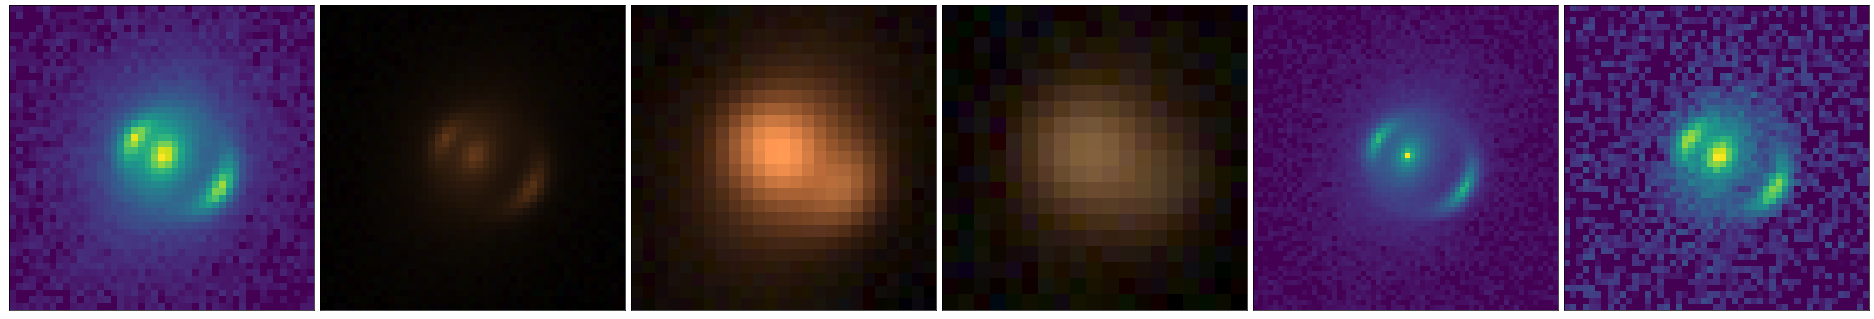

In [33]:
plot.plot_list([roman, roman_rgb, lsst, des, hst, euclid]) 

In [36]:
array_list = [pandeia, lsst, hst, euclid]
title_list = ['Pandeia Roman (F106)', 'LSST (g, r, i)', 'HST (WFC3 F160W)', 'Euclid (VIS)']

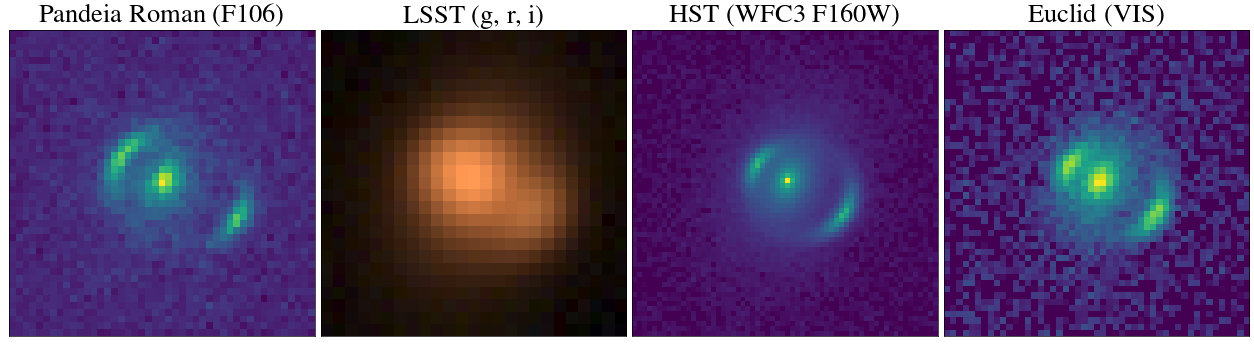

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=len(array_list), figsize=(16, 4), gridspec_kw={'hspace': 0.02, 'wspace': 0.02})

fontsize = 16
matplotlib.rcParams.update({'font.size': fontsize})

for i, array in enumerate(array_list):
    ax[i].imshow(array)
    # ax[0].set_xlabel('')
    # ax[0].set_ylabel('')
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)
    ax[i].set_title(title_list[i])

plt.savefig(os.path.join(figure_dir, 'telescope_compare.png'))
plt.show()